# **VesselBoost Toolbox**
## Module 1 - predict
VesselBoost provides a prediction module, which allows you to use our pre-trained models to segment your data. 

### Pre-trained models
We currently provide 3 pre-trained models (manual, om1, and om2) on Open Science Framework, which you can easily download by running the following cell:

In [1]:
!mkdir -p ./../saved_models/
!osf -p abk4p fetch /pretrained_models/manual_0429 ./../saved_models/manual_0429
# !osf -p abk4p fetch /pretrained_models/omelette1_0429 ./../saved_models/omelette1_0429
# !osf -p abk4p fetch /pretrained_models/omelette2_0429 ./../saved_models/omelette2_0429

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 38.4Mbytes/s]


To illustrate the usage of our toolbox, we will download a public MRA dataset next:

In [ ]:
# Download the data
!mkdir -p ./../data/img/
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../data/img/GRE_400um.nii

mkdir: cannot create directory ‘./../data/img/’: No such file or directory


100%|█████████████████████████████████████| 164M/164M [00:01<00:00, 108Mbytes/s]


### Predict without preprocessing 
If you don't want to preprocess your data following our pipeline (N4 bias field correction, denoising), just set the argument *--prep_mode* to 4:

In [3]:
!mkdir -p ./../saved_imgs/generated_label/
!python ./../prediction.py \
    --image_path "./../data/img/" \
    --output_path "./../saved_imgs/generated_label/" \
    --pretrained ./../saved_models/manual_0429 \
    --prep_mode 4

2026-02-23 17:21:41,466 - INFO - Prediction session will start shortly..
2026-02-23 17:21:41,466 - INFO - Parameters Info:
2026-02-23 17:21:41,466 - INFO - *************************************************************
2026-02-23 17:21:41,466 - INFO - Input image path: ./../data/img/, Preprocessed path: ./../data/img/, Output path: ./../saved_imgs/generated_label/, Prep_mode: 4
2026-02-23 17:21:41,466 - INFO - Preprocessing aborted by user
2026-02-23 17:21:41,466 - INFO - Using standard ImagePredictor (original method)
2026-02-23 17:21:41,576 - INFO - Using device: cuda
/scratch/user/uqmxu4/Tools/VesselBoost_backup/library/module_utils.py:459: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In

VesselBoost will generate both a *nifti* file of the segmentation (.nii/.nii.gz) and a maximum intensity projection image (.jpg) as shown below:

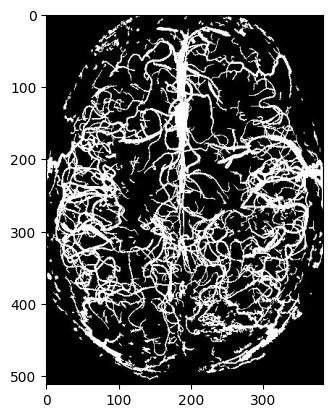

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../saved_imgs/generated_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

### Predict with preprocessing

If you require preprocessing, there are three options:
 - Set prep_mode to 1 for N4 bias field correction only;
 - Set prep_mode to 2 for denoising only;
 - Set prep_mode to 3 for both. 
 
In any of those settings, you also have to set a path to store the preprocessed images as in the following:

In [5]:
!mkdir -p ./../data/preprocessed/
!mkdir -p ./../saved_imgs/generated_label_2/
!python ./../prediction.py \
    --image_path "./../data/img/" \
    --preprocessed_path "./../data/preprocessed/" \
    --output_path "./../saved_imgs/generated_label_2/" \
    --pretrained "./../saved_models/manual_0429" \
    --prep_mode 1

2026-02-23 17:22:25,775 - INFO - Prediction session will start shortly..
2026-02-23 17:22:25,775 - INFO - Parameters Info:
2026-02-23 17:22:25,775 - INFO - *************************************************************
2026-02-23 17:22:25,775 - INFO - Input image path: ./../data/img/, Preprocessed path: ./../data/preprocessed/, Output path: ./../saved_imgs/generated_label_2/, Prep_mode: 1
2026-02-23 17:22:25,776 - INFO - Preprocessor initialized: ../data/img -> ../data/preprocessed
2026-02-23 17:22:25,776 - INFO - Starting preprocessing procedure
Processing images: 100%|██████████████████████████| 1/1 [00:57<00:00, 57.36s/it]
2026-02-23 17:23:23,136 - INFO - Successfully processed 1 images
2026-02-23 17:23:23,136 - INFO - Using standard ImagePredictor (original method)
2026-02-23 17:23:23,245 - INFO - Using device: cuda
/scratch/user/uqmxu4/Tools/VesselBoost_backup/library/module_utils.py:459: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default valu

And here is the MIP image:

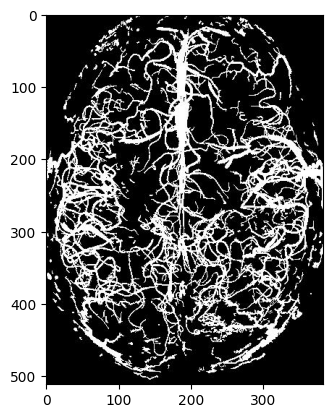

In [6]:
mip_image = img.imread("./../saved_imgs/generated_label_2/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')